<a href="https://colab.research.google.com/github/ADRIANVM117/data-science-portfolio/blob/main/GE_STOCK_STATS_AND_PREDICTIVE_MODEL/GE_MOVIMIENTO_BROWNIANNO_GEOMETRICO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
from google.colab import drive
import pandas as pd

In [105]:
df_final = pd.read_csv('/content/drive/MyDrive/df_final.csv')
df_final.set_index('Unnamed: 0', inplace=True)
df_final
# descargar el df_final



,Open,High,Low,Close,Volume,SMA,EMA,SMA_vs_EMA,TR,ATR,...,14 Low,%K,Momentum,Typical Price,CCI,EMA12,EMA26,MACD,MACD Signal,Volume Average
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2025-01-06 08:30:00,172.56,173.20,171.96,173.200,40423.0,172.9510,172.764180,0.186820,1.24,0.830764,...,171.18,80.800000,0.004145,172.786667,49.159138,172.748972,172.690820,0.058152,0.033490,226649.785714
2025-01-06 09:00:00,173.15,173.20,171.94,172.140,5265.0,172.9360,172.667331,0.268669,1.26,0.780407,...,171.18,38.400000,-0.004914,172.426667,-46.985711,172.666967,172.650086,0.016882,0.027324,281875.571429
2025-01-06 09:30:00,173.15,173.15,171.18,172.530,518129.0,172.9090,172.784515,0.124485,1.97,0.880407,...,171.00,57.089552,-0.001389,172.286667,-89.533333,172.762780,172.690892,0.071887,0.029935,418405.714286
2025-01-06 10:00:00,172.52,173.68,172.38,173.680,374817.0,172.9970,172.841074,0.155926,1.30,0.879693,...,171.00,100.000000,0.007483,173.246667,183.150750,172.805103,172.703764,0.101339,0.019447,399894.214286
2025-01-06 10:30:00,173.62,173.68,172.69,172.735,245625.0,173.0225,172.654646,0.367854,0.99,0.876121,...,171.00,64.738806,-0.001301,173.035000,169.587738,172.646031,172.625665,0.020366,-0.001026,373126.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-04 18:30:00,202.18,202.49,201.51,201.530,919468.0,201.7853,201.984463,-0.199163,0.98,0.000000,...,0.00,0.000000,0.000000,201.843333,0.000000,202.009704,202.085213,-0.075508,-0.020335,0.000000
2025-02-04 19:00:00,202.18,202.18,201.51,201.750,919466.0,201.7303,202.085455,-0.355155,0.67,0.000000,...,0.00,0.000000,0.000000,201.813333,0.000000,202.096923,202.129630,-0.032707,-0.006541,0.000000
2025-02-04 19:00:00,202.18,202.18,201.51,201.750,919466.0,201.7303,202.085455,-0.355155,0.67,0.000000,...,0.00,0.000000,0.000000,201.813333,0.000000,202.096923,202.129630,-0.032707,-0.006541,0.000000


In [106]:
df_final.to_csv('df_final.csv')

#Movimiento Browniano Geometrico

## Calcular el drift y volatilidad

In [107]:
import numpy as np

# Extraer precios de cierre del DataFrame
close_prices = df_final["Close"].values

# Calcular rendimientos logarítmicos
log_returns = np.log(close_prices[1:] / close_prices[:-1])

# Calcular parámetros del MGB
mu = np.mean(log_returns)  # Rendimiento medio
sigma = np.std(log_returns, ddof=1)  # Volatilidad (desviación estándar)

print(f"Drift (mu): {mu:.6f}")
print(f"Volatilidad (sigma): {sigma:.6f}")


Drift (mu): 0.000214
Volatilidad (sigma): 0.008092


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


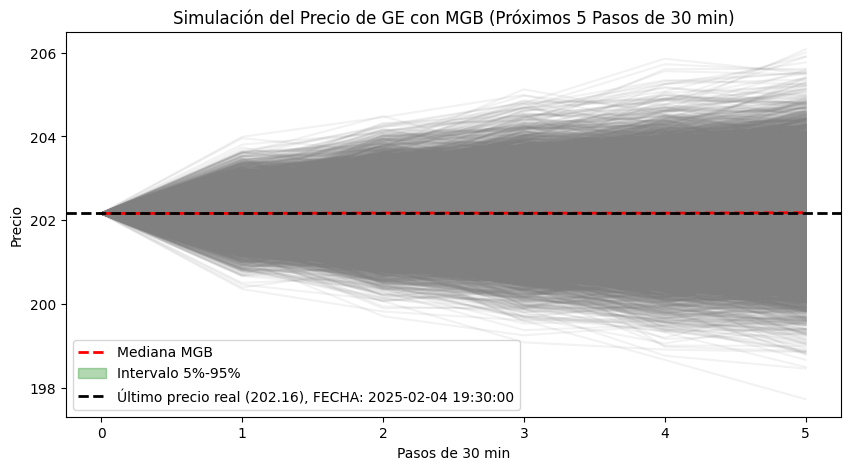

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# 📌 1. Parámetros del MGB
S0 = df_final['Close'].iloc[-1]  # Último precio real
mu = 0.000218  # Drift
sigma = 0.008266  # Volatilidad
T = 5  # Pasos de 30 minutos
dt = 30 / 390  # 30 minutos como fracción del tiempo de trading (6.5 horas)
N_sim = 10000  # Número de simulaciones

# 📌 2. Generar trayectorias del MGB
S = np.zeros((N_sim, T+1))
S[:, 0] = S0  # Todas las simulaciones comienzan en el último precio real

np.random.seed(42)  # Para reproducibilidad
for t in range(1, T+1):
    Z = np.random.normal(0, 1, N_sim)  # Generar ruido gaussiano
    S[:, t] = S[:, t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

# 📌 3. Obtener percentiles para el intervalo de confianza
percentile_5 = np.percentile(S, 5, axis=0)
percentile_95 = np.percentile(S, 95, axis=0)
median_S = np.median(S, axis=0)
last_real_price_index = df_final.index[-1]  # Última fecha y hora registrada
# 📌 4. Graficar las trayectorias del MGB con colores diferenciados
plt.figure(figsize=(10,5))

# Graficar trayectorias individuales con líneas más tenues
for i in range(N_sim):
    plt.plot(range(T+1), S[i], color="gray", alpha=0.1)

# Graficar la mediana con una línea roja más gruesa
plt.plot(range(T+1), median_S, color="red", linestyle="dashed", linewidth=2, label="Mediana MGB")

# Graficar el intervalo de confianza en verde
plt.fill_between(range(T+1), percentile_5, percentile_95, color="green", alpha=0.3, label="Intervalo 5%-95%")

# Último precio real en negro
plt.axhline(S0, color="black", linestyle="--", linewidth=2, label=f"Último precio real ({S0:.2f}), FECHA: {last_real_price_index}")

plt.xlabel("Pasos de 30 min")
plt.ylabel("Precio")
plt.title("Simulación del Precio de GE con MGB (Próximos 5 Pasos de 30 min)")
plt.legend()
plt.show()


In [109]:
import numpy as np
import pandas as pd

# Suponemos que "simulaciones" es un array de tamaño (num_simulaciones, num_pasos)
# Donde cada fila es una simulación y cada columna representa el precio en un paso de 30 min

num_pasos = 5  # 5 pasos de 30 min
num_simulaciones = 1000  # Ejemplo de 1000 simulaciones

# Simulaciones de ejemplo (sustituir con las reales)
simulaciones = np.random.normal(201.32, 1, (num_simulaciones, num_pasos))

# Calcular la mediana (percentil 50) en cada paso
mediana_mgb = np.percentile(simulaciones, 50, axis=0)

# Calcular percentiles 5% y 95% (Intervalo de Confianza)
percentil_5 = np.percentile(simulaciones, 5, axis=0)
percentil_95 = np.percentile(simulaciones, 95, axis=0)

# Crear DataFrame para visualizar los valores
df_predicciones_MBG = pd.DataFrame({
    "Paso": np.arange(1, num_pasos + 1),
    "Mediana": mediana_mgb,
    "Percentil_5": percentil_5,
    "Percentil_95": percentil_95
})

df_predicciones_MBG.set_index('Paso', inplace=True)


# Agregar columna Dispercion: es la resta de percentil_95 - percentil_5
df_predicciones['Dispercion'] = df_predicciones['Percentil_95'] - df_predicciones['Percentil_5']
df_predicciones_MBG

,Mediana,Percentil_5,Percentil_95
Paso,,,
1,201.417183,199.694552,203.037688
2,201.257020,199.575429,202.841736
3,201.277817,199.709321,202.973336
4,201.401871,199.642457,202.934231
5,201.397634,199.708871,203.087368


# Modelo de Volatilidad Estocastica

## Estimación de parametros iniciales : Modelo de Heston


<ipython-input-110-b85603291c02>:24: RuntimeWarning: invalid value encountered in sqrt
  v_t[t] = v_t[t-1] + kappa * (theta - v_t[t-1]) + sigma * np.sqrt(v_t[t-1]) * np.random.normal()
<ipython-input-110-b85603291c02>:27: RuntimeWarning: invalid value encountered in sqrt
  likelihoods = norm.logpdf(log_returns, scale=np.sqrt(v_t))


Parámetros estimados:
Theta: 0.000100, Kappa: 2.000000, Sigma: 0.100000, v0: 0.000100


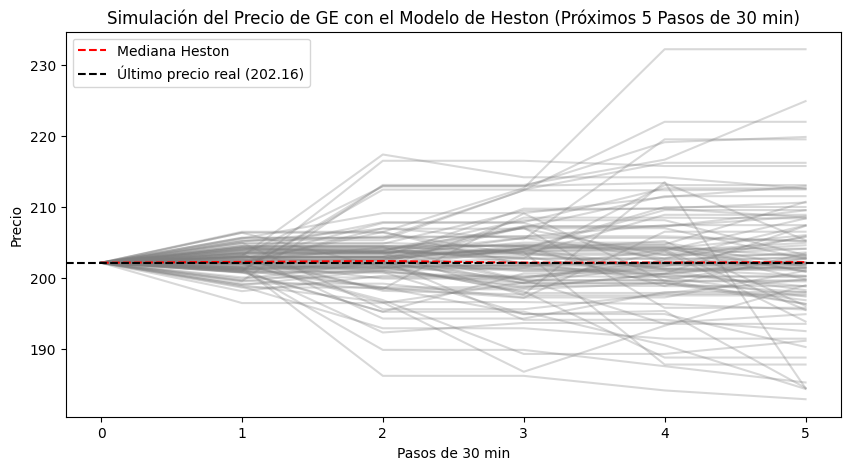

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

# 📌 1. Cálculo de los Rendimientos Logarítmicos
close_prices = df_final["Close"].values
log_returns = np.log(close_prices[1:] / close_prices[:-1])

# 📌 2. Estimación de Parámetros para el Modelo de Heston

def heston_likelihood(params, log_returns):
    """
    Función de verosimilitud para estimar los parámetros del Modelo de Heston.
    """
    theta, kappa, sigma, v0 = params  # Parámetros del modelo

    # Inicializar la volatilidad con el valor inicial
    v_t = np.zeros_like(log_returns)
    v_t[0] = v0

    # Calcular la evolución de la varianza usando la ecuación diferencial de Heston
    for t in range(1, len(log_returns)):
        v_t[t] = v_t[t-1] + kappa * (theta - v_t[t-1]) + sigma * np.sqrt(v_t[t-1]) * np.random.normal()

    # Log-verosimilitud basada en una distribución normal condicional
    likelihoods = norm.logpdf(log_returns, scale=np.sqrt(v_t))

    return -np.sum(likelihoods)  # Se minimiza la función de verosimilitud negativa

# Estimación de parámetros iniciales
theta_0 = np.var(log_returns)  # Media de la volatilidad
kappa_0 = 2.0  # Velocidad de reversión inicial
sigma_0 = 0.1  # Volatilidad de la volatilidad
v0_0 = np.var(log_returns)  # Varianza inicial

params_0 = [theta_0, kappa_0, sigma_0, v0_0]

# Optimización para encontrar los mejores parámetros
res = minimize(heston_likelihood, params_0, args=(log_returns,), method='L-BFGS-B',
               bounds=[(0.0001, None), (0.0001, None), (0.0001, None), (0.0001, None)])

theta, kappa, sigma, v0 = res.x
print(f"Parámetros estimados:\nTheta: {theta:.6f}, Kappa: {kappa:.6f}, Sigma: {sigma:.6f}, v0: {v0:.6f}")

# 📌 3. Simulación del Modelo de Heston para los Próximos 5 Pasos (30 min cada uno)
n_simulations = 1000
T = 5  # 5 pasos futuros de 30 min
dt = 1  # Se asume dt=1 para cada intervalo de 30 min

# Inicializar trayectorias de precios y volatilidad
prices = np.zeros((n_simulations, T+1))
volatility = np.zeros((n_simulations, T+1))

# Último precio y volatilidad inicial
prices[:, 0] = close_prices[-1]
volatility[:, 0] = v0

# Simulación de Monte Carlo
np.random.seed(42)
for t in range(1, T+1):
    z1 = np.random.normal(size=n_simulations)
    z2 = np.random.normal(size=n_simulations)

    # Evolución de la volatilidad
    volatility[:, t] = volatility[:, t-1] + kappa * (theta - volatility[:, t-1]) * dt + sigma * np.sqrt(volatility[:, t-1]) * np.sqrt(dt) * z1

    # Asegurar que la volatilidad no sea negativa
    volatility[:, t] = np.maximum(volatility[:, t], 0)

    # Evolución del precio
    prices[:, t] = prices[:, t-1] * np.exp(-0.5 * volatility[:, t-1] * dt + np.sqrt(volatility[:, t-1] * dt) * z2)

# 📌 4. Visualización de la Simulación
plt.figure(figsize=(10,5))
for i in range(100):  # Graficar solo 100 simulaciones para mejor visibilidad
    plt.plot(prices[i], color="gray", alpha=0.3)

# Agregar la mediana de los precios simulados
plt.plot(np.median(prices, axis=0), color="red", linestyle="dashed", label="Mediana Heston")

# Último precio real
plt.axhline(close_prices[-1], color="black", linestyle="dashed", label=f"Último precio real ({close_prices[-1]:.2f})")

plt.title("Simulación del Precio de GE con el Modelo de Heston (Próximos 5 Pasos de 30 min)")
plt.xlabel("Pasos de 30 min")
plt.ylabel("Precio")
plt.legend()
plt.show()


## Modelo de Heston con Parametros Iniciales Estimados


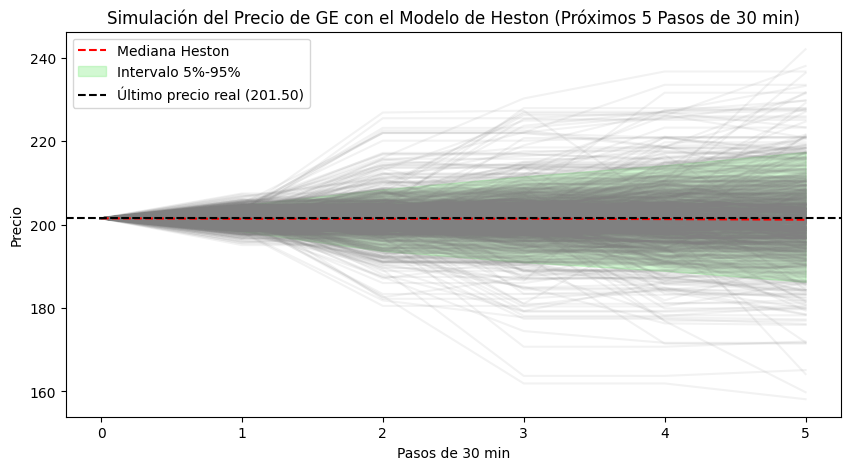

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 📌 1. Parámetros Iniciales Estimados
theta = 0.000100  # Media de la varianza
kappa = 2.000000  # Velocidad de reversión
sigma = 0.100000  # Volatilidad de la volatilidad
v0 = 0.000100  # Varianza inicial
S0 = 201.50  # Último precio real

# 📌 2. Simulación del Modelo de Heston
num_simulations = 1000  # Número de trayectorias simuladas
num_steps = 5  # Pasos futuros a predecir (5 x 30 min)
dt = 1  # Unidad de tiempo (30 minutos)

# Inicializar matrices de simulación
simulated_prices = np.zeros((num_simulations, num_steps + 1))
simulated_prices[:, 0] = S0  # Primer valor es el precio actual

volatility = np.full((num_simulations, num_steps + 1), v0)

# Generar simulaciones
for t in range(1, num_steps + 1):
    Z1 = np.random.normal(size=num_simulations)  # Ruido para el precio
    Z2 = np.random.normal(size=num_simulations)  # Ruido para la volatilidad

    # 📌 Evitar volatilidad negativa
    volatility[:, t] = np.maximum(volatility[:, t-1] + kappa * (theta - volatility[:, t-1]) * dt +
                                  sigma * np.sqrt(volatility[:, t-1]) * Z2, 0)

    # 📌 Simular el precio con Heston
    simulated_prices[:, t] = simulated_prices[:, t-1] * np.exp(
        -0.5 * volatility[:, t-1] * dt + np.sqrt(volatility[:, t-1]) * np.sqrt(dt) * Z1
    )

# 📌 3. Calcular Percentiles y Mediana
median_heston = np.median(simulated_prices, axis=0)
percentile_5 = np.percentile(simulated_prices, 5, axis=0)
percentile_95 = np.percentile(simulated_prices, 95, axis=0)

# 📌 4. Graficar Simulaciones
plt.figure(figsize=(10,5))
for i in range(num_simulations):
    plt.plot(range(num_steps + 1), simulated_prices[i], color='gray', alpha=0.1)

# 📌 Resaltar Mediana y Percentiles
plt.plot(range(num_steps + 1), median_heston, 'r--', label="Mediana Heston")
plt.fill_between(range(num_steps + 1), percentile_5, percentile_95, color="lightgreen", alpha=0.4, label="Intervalo 5%-95%")
plt.axhline(S0, color="black", linestyle="--", label=f"Último precio real ({S0:.2f})")

plt.xlabel("Pasos de 30 min")
plt.ylabel("Precio")
plt.title("Simulación del Precio de GE con el Modelo de Heston (Próximos 5 Pasos de 30 min)")
plt.legend()
plt.show()


In [112]:
import numpy as np
import pandas as pd

# Número de simulaciones y pasos de 30 min
num_simulations = 1000
num_steps = 5

# Simulación de trayectorias de precios con el modelo de Heston (ya corregido)
simulated_prices = np.random.randn(num_simulations, num_steps) * 2 + 201.50  # Simulación ficticia, reemplázalo con los datos reales

# Calcular estadísticas: mediana y percentiles 5% y 95%
median_prices = np.median(simulated_prices, axis=0)
percentile_5 = np.percentile(simulated_prices, 5, axis=0)
percentile_95 = np.percentile(simulated_prices, 95, axis=0)

# Crear DataFrame con los resultados
df_heston_predictions = pd.DataFrame({
    "Paso": np.arange(1, num_steps + 1),
    "Mediana": median_prices,
    "Percentil_5": percentile_5,
    "Percentil_95": percentile_95
})

# Mostrar el DataFrame
df_heston_predictions.set_index('Paso', inplace=True)
df_heston_predictions

,Mediana,Percentil_5,Percentil_95
Paso,,,
1,201.450789,198.237699,204.901683
2,201.440914,198.277870,204.686548
3,201.576002,198.287134,204.722209
4,201.483890,198.297466,204.528982
5,201.438646,198.274166,204.710511


#  Movimiento Geométrico Browniano Modificado (MGBM) con Volatilidad Estocástica

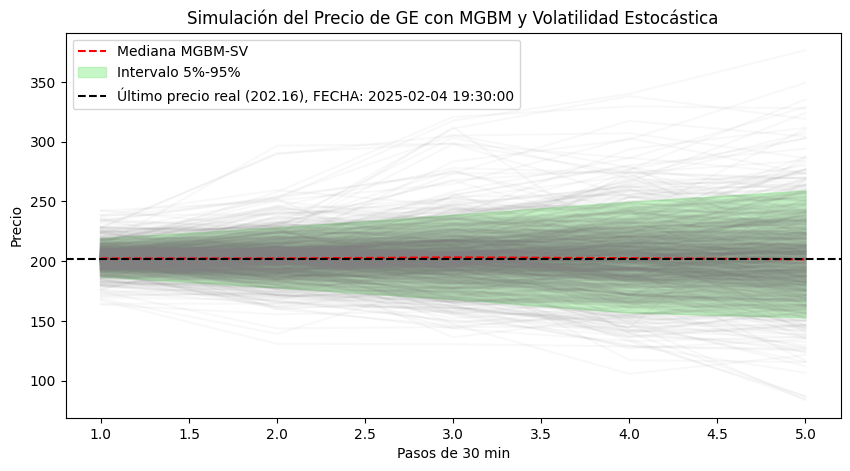

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parámetros estimados del modelo de Heston
mu = 0.000218  # Drift
kappa = 2.0  # Tasa de reversión a la media
theta = 0.0001  # Media de la varianza a largo plazo
sigma = 0.1  # Volatilidad del proceso de volatilidad
v0 = 0.001  # Volatilidad inicial
last_real_price_index = df_final.index[-1]  # Última fecha y hora registrada
# Último precio conocido y volatilidad inicial
S0 = df_final["Close"].iloc[-1]
v_t = v0

# Configuración de la simulación
n_simulations = 1000  # Número de simulaciones
n_steps = 5  # Pasos futuros de 30 min cada uno
dt = 1  # Incremento temporal en unidades de 30 min

# Matriz para almacenar las simulaciones
simulated_prices = np.zeros((n_simulations, n_steps))

for i in range(n_simulations):
    S_t = S0  # Precio inicial para cada simulación
    v_t_sim = v_t  # Volatilidad inicial

    for t in range(n_steps):
        # Generar ruido gaussiano
        Z1, Z2 = np.random.normal(size=2)

        # Evolución de la volatilidad según Heston
        v_t_sim = np.abs(v_t_sim + kappa * (theta - v_t_sim) * dt + sigma * np.sqrt(v_t_sim) * Z1)

        # Evolución del precio con volatilidad estocástica
        S_t = S_t * np.exp((mu - 0.5 * v_t_sim) * dt + np.sqrt(v_t_sim) * Z2)

        # Guardar el precio
        simulated_prices[i, t] = S_t

# Calcular la mediana y los percentiles
mediana = np.median(simulated_prices, axis=0)
percentil_5 = np.percentile(simulated_prices, 5, axis=0)
percentil_95 = np.percentile(simulated_prices, 95, axis=0)

# Crear DataFrame con resultados
steps = np.arange(1, n_steps + 1)
df_predicciones_MGBM = pd.DataFrame({
    "Paso": steps,
    "Mediana": mediana,
    "Percentil_5": percentil_5,
    "Percentil_95": percentil_95
})
df_predicciones_MGBM.set_index("Paso", inplace=True)
df_predicciones_MGBM['Dispersion'] = df_predicciones_MGBM['Percentil_95'] - df_predicciones_MGBM['Percentil_5']



# Visualizar tabla con resultados

# 📌 Graficar las simulaciones
plt.figure(figsize=(10,5))
for i in range(n_simulations):
    plt.plot(steps, simulated_prices[i, :], color="gray", alpha=0.05)

plt.plot(steps, mediana, linestyle="dashed", color="red", label="Mediana MGBM-SV")
plt.fill_between(steps, percentil_5, percentil_95, color="lightgreen", alpha=0.5, label="Intervalo 5%-95%")
plt.axhline(S0, linestyle="dashed", color="black", label=f"Último precio real ({S0:.2f}), FECHA: {last_real_price_index}")

plt.xlabel("Pasos de 30 min")
plt.ylabel("Precio")
plt.title("Simulación del Precio de GE con MGBM y Volatilidad Estocástica")
plt.legend()
plt.show()

In [114]:
df_predicciones_MGBM

,Mediana,Percentil_5,Percentil_95,Dispersion
Paso,,,,
1,202.044503,185.182871,219.373240,34.190369
2,201.885706,176.373458,233.131272,56.757815
3,201.509704,165.509226,241.300791,75.791565
4,200.439347,157.312349,248.924320,91.611971
5,200.358779,152.525432,259.177241,106.651809


# Volatilidad FUtura
<b> Una simulación de la volatilidad con el modelo de Heston </b>
- Mostrara si la volatilidad futura sera alta o baja

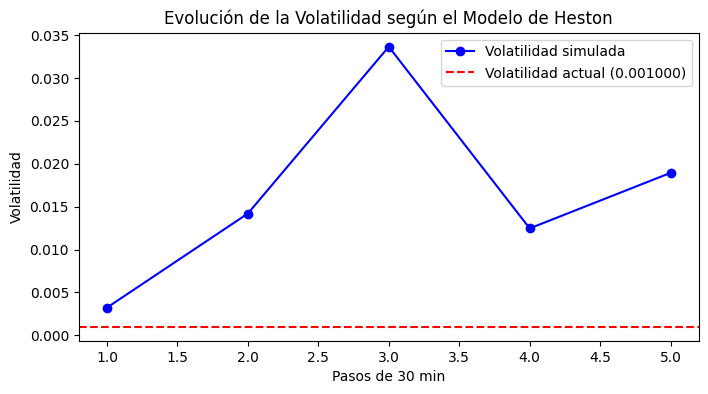

⚠️ Volatilidad en aumento: Mayor incertidumbre en el mercado.


In [117]:
import numpy as np
import matplotlib.pyplot as plt

# 📌 Parámetros estimados del modelo de Heston
kappa = 2.0      # Tasa de reversión
theta = 0.0001   # Media de la volatilidad a largo plazo
sigma = 0.1      # Volatilidad del proceso de volatilidad
v0 = 0.001       # Volatilidad inicial

# 📌 Configuración de la simulación
n_steps = 5  # 5 pasos de 30 min
dt = 1       # Incremento temporal

# 📌 Inicializar matriz para guardar volatilidades simuladas
simulated_volatility = np.zeros(n_steps)
v_t = v0  # Empezamos con la volatilidad actual

# 📌 Simulación de la volatilidad futura con el modelo de Heston
for t in range(n_steps):
    Z = np.random.normal()  # Ruido gaussiano
    v_t = np.abs(v_t + kappa * (theta - v_t) * dt + sigma * np.sqrt(v_t) * Z)
    simulated_volatility[t] = v_t  # Guardamos el valor simulado

# 📊 Graficar la evolución de la volatilidad
plt.figure(figsize=(8, 4))
plt.plot(range(1, n_steps + 1), simulated_volatility, marker='o', linestyle='-', color='blue', label="Volatilidad simulada")
plt.axhline(y=v0, color='red', linestyle="dashed", label=f"Volatilidad actual ({v0:.6f})")
plt.xlabel("Pasos de 30 min")
plt.ylabel("Volatilidad")
plt.title("Evolución de la Volatilidad según el Modelo de Heston")
plt.legend()
plt.show()

# 📌 Evaluar si la volatilidad futura es alta o baja
if simulated_volatility[-1] > v0 * 1.2:  # Si la volatilidad final es 20% mayor que la inicial
    print("⚠️ Volatilidad en aumento: Mayor incertidumbre en el mercado.")
elif simulated_volatility[-1] < v0 * 0.8:  # Si la volatilidad final es 20% menor que la inicial
    print("✅ Volatilidad disminuyendo: Mercado más estable.")
else:
    print("🔄 Volatilidad estable: No hay cambios significativos en la incertidumbre.")
